In [1]:
"""
数据分析三连
matplotlib加入中文支持
"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 1.房价预测问题：
我们收集了一个地区共n套房的房屋面积和房价<br>
目标是通过建模房屋面积和房价的关系<br>
使得下次有朋友在此地区买房的时候，知道房屋面积，可以估计此房的价格，不至于被坑

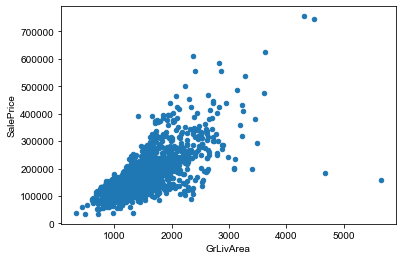

In [2]:
"""
使用kaggle房价预测数据集
我们试图仅使用房屋居住面积来预测房价
train.csv downloaded from 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
"""
df = pd.read_csv("train.csv")
df.plot(x="GrLivArea",y="SalePrice",kind="scatter")
plt.show()

记第$i$套房的居住面积为$x^{(i)}$，价格为$y^{(i)}$<br>
房价预测问题就是找到一个函数$f$，使得从总体上有：<br>
$$f(x^{(i)}) \approx y^{(i)}$$<br>
而最简单的函数就是线性函数，使用线性函数建模即：<br>
$$f(x^{(i)}) =h_{\theta}(x^{(i)})= \theta_{0} + \theta_{1}x^{(i)}$$<br>
从前面的图来看，使用线性函数来预测是合理的<br>

若我们在预测房价时不仅使用房子的居住面积$x_{1}$，还使用房屋的卧室个数$x_{2}$，...，$x_{d}$，一共d项数值<br>
那么上面的线性函数就拓展为：<br>
$$\theta_{0} + \theta_{1}x_{1}^{(i)} + \theta_{2}x_{2}^{(i)} + ... + \theta_{n}x_{n}^{(i)}$$<br>
若我们令$x_{0}^{(i)}=1$，并记$x^{(i)} = (x_{0}^{(i)},x_{1}^{(i)},...,x_{d}^{(i)})$，$\theta = (\theta_{0},\theta_{1},...,\theta_{d})$<br>
上面就可以简写为：<br>
$$h_{\theta}(x^{(i)})=\sum_{j=0}^{n} \theta_{i} x_{j}^{(i)}=\theta^{T}x^{(i)}$$

# 2.参数选择

如何选择$\theta$呢，问题就在于量化$h_{\theta}(x^{(i)}) \approx y^{(i)}$

我们的策略是用一个函数$l$来量化预测值$h_{\theta}(x^{(i)})$和真实值$y^{(i)}$的接近程度，函数值越小说明越接近，这个函数被称为损失函数（lost function）<br>
然后选择$\theta$使得它可以最小化总的损失函数$J(\theta):=c\sum_{i=1}^{n}l(h_{\theta}(x^{(i)}), y^{(i)})$，$J(\theta)$被称为目标函数（cost function），即：

$$\hat{\theta } = \underset{\theta}{argmin}J(\theta)$$

对于回归问题，我们将损失函数定义为平方差：$l(x,y):=(x - y)^2$<br>
此时，目标函数(c=1/2)
$$J(\theta) := \frac{1}{2}\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})^2$$<br>

# 3.梯度下降

如何取$\theta$使得$J(\theta)$最小呢

一种方法是先随机取一个初始值$\theta$，然后往着使$J(\theta)$变小的方向更新，直至迭代了足够多轮或者$J(\theta)$无法显著减小为止<br>
对于连续可微函数$J(\theta)$，由于对于任意的$l\in \mathbb{R}^{d}, \left \| l \right \| =1$

$$\lim_{x \to 0} \frac{J(\theta + x l) - J(\theta ) }{x}=l \cdot \nabla{J(\theta )} >= -\left \| l \right \|\left \|J(\theta)  \right \| = -\left \|  J(\theta )\right \|   $$

等号取到当且仅当$l与 \nabla{J(\theta )}$方向相反<br>
所以可以让$\theta$在$ -\nabla{J(\theta )}$方向更新，在这个方向上目标函数的下降速度是最大的

$$\theta: =\theta - \alpha \nabla{J(\theta)}$$

其中$\alpha$是学习率，用来调整学习的速度<br>

# 4.线性回归的梯度下降公式

对于线性回归：

$$
\begin{equation}\begin{split} 
\frac{\partial }{\partial \theta_{j}}J(\theta ) &=  \frac{\partial }{\partial \theta_{j}}\frac{1}{2}\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})^2  \\ 
&=\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})\cdot{}\frac{\partial }{\partial \theta_{j}}(h_{\theta }(x^{(i)}) - y^{(i)})\\ 
& =\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})x_{j}^{(i)}
\end{split}\end{equation}
$$

从而，线性回归的梯度下降公式就是：

$$\theta_{j}: =\theta_{j} - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$

合起来就是：

$$\theta: =\theta - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})\cdot x^{(i)} $$

写成矩阵形式就是：

$$\theta: =\theta - \alpha X^{T}(X\theta-\mathbf{y} ) $$

In [3]:
def batch_linear_gradient_descent(x, y, learning_rate, iter_times):
    """
    x's shape: (num_samples, dimension)
    y's shape: (num_samples, 1)
    参数theta初始化为0
    返回经过iter_times轮学习率为learning_rate的梯度下降后的参数theta
    """
    dim = x.shape[1]
    theta = np.zeros((dim, 1))
    for i in range(iter_times):
        gradient = np.dot(x.transpose(), np.dot(x, theta) - y)
        theta -= learning_rate * gradient
    return theta

# 5.随机梯度下降

前面的梯度下降也被称为批量梯度下降（batch gradient descent）<br>
实践中它有一个缺点，就是每一次更新$\theta$都需要遍历每一个样本，若样本量很大，则耗时耗资源

为解决这个问题，我们可以每次随机选取一个样本$i, \theta$此次仅使用它的损失函数的梯度来更新，即：

$$\theta: =\theta - \alpha(h_{\theta }(x^{(i)}) - y^{(i)})\cdot x^{(i)} $$

In [4]:
def stochastic_gradient_descent(x, y, learning_rate, iter_times):
    """
    x's shape: (num_samples, dimension)
    y's shape: (num_samples, 1)
    参数theta初始化为0
    返回经过iter_times轮学习率为learning_rate的随机梯度下降后的参数theta
    """
    num_samples, dim = x.shape
    theta = np.zeros((dim, 1))
    for i in range(iter_times):
        index = np.random.randint(0, num_samples)
        theta -= learning_rate * (np.dot(x[index], theta) - y[index]) * x[index].reshape(-1, 1)
    return theta

# 5.小批量梯度下降

随机梯度下降也有其缺点，即$\theta$的波动性很大，很可能不朝着使得$J(\theta)$下降的方向更新

为了规避两方的致命弱点，使得从总体上梯度下降又快又准，我们一般使用折中的方案，即小批量随机梯度下降<br>
我们把样本分割成batch_size(一般取32、64、128、256等数值)的小批量，每次仅根据小批量内的样本来更新$\theta$，即：

$$\theta: =\theta - \alpha\sum_{i \in batch}(h_{\theta }(x^{(i)}) - y^{(i)})\cdot x^{(i)} $$

In [5]:
def mini_batch_linear_gradient_descent(x, y, learning_rate, batch_size, num_epochs):
    """
    x's shape: (num_samples, dimension)
    y's shape: (num_samples, 1)
    参数theta初始化为0
    批量大小为batch_size
    返回经过num_epochs大轮学习率为learning_rate的小批量梯度下降后的参数theta
    """
    num_samples, dim = x.shape
    theta = np.zeros((dim, 1))
    indexes = np.arange(num_samples)
    np.random.shuffle(indexes)
    for i in range(num_epochs):
        for j in range((num_epochs + batch_size - 1) // batch_size):
            batch_indexes = indexes[j * batch_size: (j + 1) * batch_size]
            gradient = np.dot(x[batch_indexes].transpose(), np.dot(x[batch_size], theta) - y[batch_indexes])
            theta -= learning_rate * gradient
    return theta

# 6.求精确解

对于线性回归，$J(\theta)$的最小值也可以直接求解

$J(\theta)$可以写成向量形式：$J(\theta) = \frac{1}{2}(X\theta-\mathbf{y} )^{T}(X\theta-\mathbf{y} )$

由于极值点的梯度为0，因此求$J(\theta)$的梯度：

$$
\begin{equation}
\begin{split} 
\nabla_{\theta }J(\theta)&=\nabla_{\theta }\frac{1}{2} (X\theta-\mathbf{y} )^{T}(X\theta-\mathbf{y} ) \\
&=\frac{1}{2}\nabla_{\theta}(\theta^{T}(X^{T}X)\theta -2(X^{T}\mathbf{y} )^{T}\theta ) \\
&=X^{T}X\theta -X^{T}\mathbf{y}
\end{split}
\end{equation}
$$

让它等于0<br>
若$X^{T}X$满秩，可求得$\theta=(X^{T}X)^{-1}X^{T}\mathbf{y}$<br>
若$X^{T}X$不满秩，$\theta$依然存在...

上面用到了<br>
1.$\nabla_{x }a^{T}x = a$<br>
2.对于对称矩阵$\nabla_{x}x^{T}Ax = 2Ax$<br>
均可直接进行验证

In [6]:
def direct_solution(x, y):
    """
    x.t * x 满秩的情况
    """
    return np.dot((np.dot(x.transpose(), x)).I, np.dot(x.transpose(), y))

# 7.正则化

在线性回归的过程中，若我们求解出的$\theta$的绝对值可能很大<br>
造成$h_{\theta}$的复杂度升高，很可能造成$h_{\theta}$仅拟合训练集，而不拟合测试集的情况，即过拟合

为了避免这种情况，我们在拟合训练数据的同时也要阻止$\theta$过大<br>
我们可以在先前目标函数的基础上加上$\theta$大小的惩罚项，如加上l2惩罚项：

$$J(\theta) := \frac{1}{2}\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})^2 + \frac{1}{2}\lambda \left \| \theta  \right \|_{2}^{2} $$<br>

上面被称为Ridge regression

也可以加上l1惩罚项：

$$J(\theta) := \frac{1}{2}\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})^2 + \lambda \left \| \theta  \right \|_{1} $$<br>
被称为Lasso regression

其中$\lambda$是惩罚系数，用来调节惩罚力度

In [7]:
def batch_ridge_gradient_descent(x, y, learning_rate, iter_times, lambd):
    """
    x's shape: (num_samples, dimension)
    y's shape: (num_samples, 1)
    参数theta初始化为0
    返回经过iter_times轮学习率为learning_rate的梯度下降后的参数theta
    """
    dim = x.shape[1]
    theta = np.zeros((dim, 1))
    for i in range(iter_times):
        gradient = np.dot(x.transpose(), np.dot(x, theta) - y) + lambd * theta
        theta -= learning_rate * gradient
    return theta

# 8.概率解释

线性回归有其概率解释

对于未正则化的线性回归，它相当于采样于$y^{(i)} = \theta^{T}x^{(i)} + \epsilon^{(i)}$，其中$\epsilon^{(i)}$服从均值为0，方差为$\sigma^{2}$的正态分布。

用线性回归求出来的$\theta$就是它在以上假设下的最大似然估计

# 9.sklearn

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [9]:
reg.coef_, reg.intercept_

(array([1., 2.]), 3.0000000000000018)

In [10]:
reg.predict(np.array([[3, 5]]))

array([16.])